# Hello

Video game is always a big part of my personal life, while I was surfing to find a topic to practice my data analytics skills, this dataset naturally interest me a lot as I thought it would be a great and exciting opportunity to understand something relatable in a more analytical approach. 

This is my first ever notebook and mark the beginning of my journey in this field, please feel free to leave any comments to correct my mistakes or some suggestions/improvements especially on my thought process which I will be including within the notebook, thanks!

Link to Tableau dashboard: 
General dashboard:
https://public.tableau.com/app/profile/jadon.ng/viz/VideoGamesSales1980-2016_16846828369650/Dashboard1

Top 20 publisher details:
https://public.tableau.com/app/profile/jadon.ng/viz/SalesofvideogamesbyPublisher1980-2016/Dashboard1

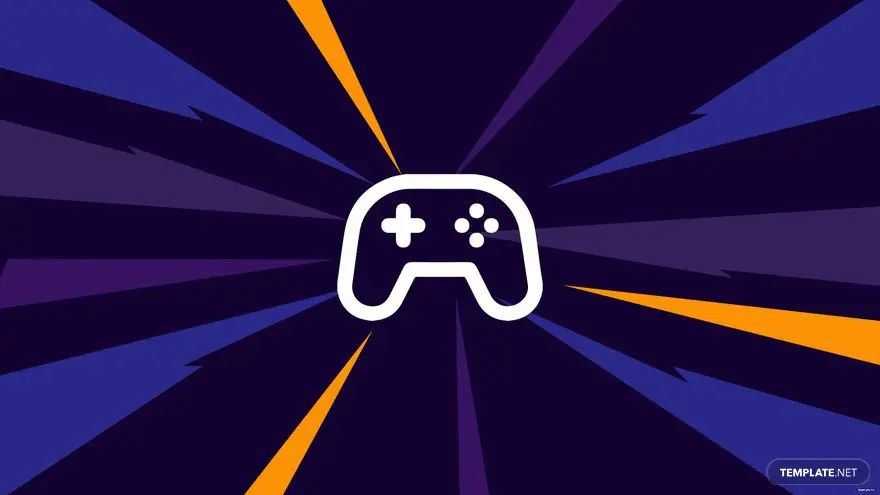

# Importing libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

%matplotlib inline
sns.set_style("white")

sns.set_theme()
sns.set(rc={"figure.dpi":125})
sns.set(rc = {"figure.figsize":(10,5)})

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
vgsales = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')
vgsales.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Cleaning and understanding the data

Now that we got the dataframe, let's try to clean our data a bit so we can have a more accurate and thoughtful insight in later analysis.

Let's drop all null and duplicates first.

In [3]:
vgsales = vgsales.dropna() 
vgsales = vgsales.drop_duplicates()

Years after 2016 got too few data available...
Maybe let's drop those entry as well.

In [4]:
vgsales = vgsales[vgsales['Year']<=2016]

#Changing year to integer
vgsales['Year'] = vgsales['Year'].apply(lambda x: int(x))

Cool, I think we are all set to go. But before we start, lemme do a little bit of counting first.

In [5]:
print(f'There are {vgsales.Publisher.nunique()} publishers.')
print(f'There are {vgsales.Genre.nunique()} genres.')
print(f'There are {vgsales.Platform.nunique()} platforms.')
print(f'Dataset reflects sales from {vgsales.Year.min()} to {vgsales.Year.max()}.')

There are 576 publishers.
There are 12 genres.
There are 31 platforms.
Dataset reflects sales from 1980 to 2016.


In [6]:
print(f'Shape: {vgsales.shape}')

Shape: (16287, 11)


# Sales across regions

There seems to be couple columns about sales of video games over the period, it should give us some insight of the general trend of the video game industry around the globe, right?

Let's plot a histogram to see the trend of video games published over these years. I would expect an exponential increase in the number of games published due to the technological advancements, increasing profitability and increasing demand for video games, let's see if we are correct.

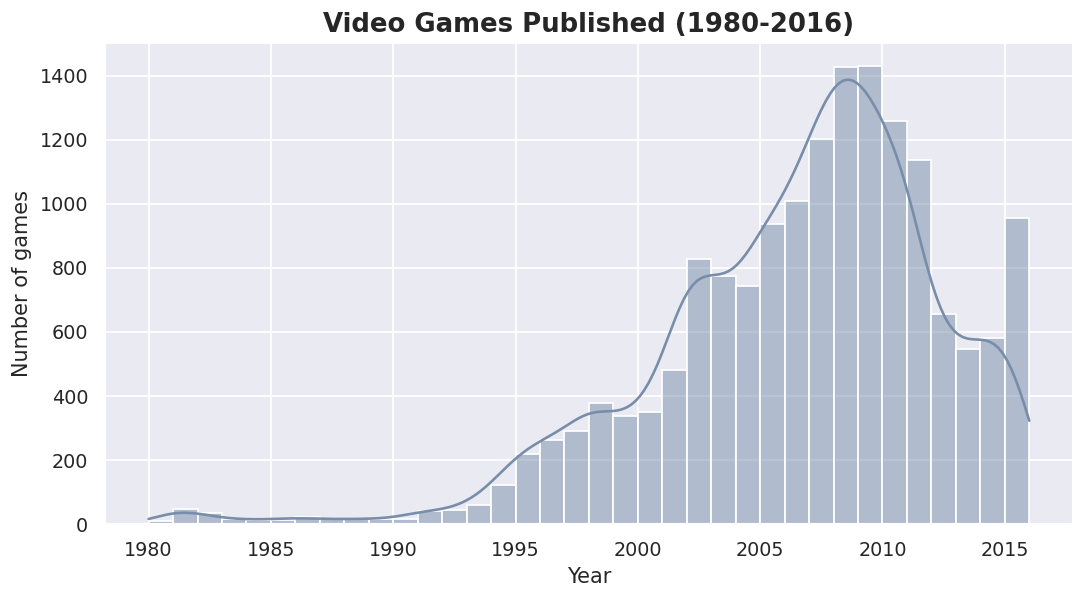

In [7]:
sns.histplot(vgsales.Year, binwidth=1,kde=True, color='#778DA9')
plt.title('Video Games Published (1980-2016)', fontdict={'size':15},fontweight = 'bold')
plt.ylabel('Number of games')
plt.show()

Hmm... The number of video games published definitely increased quite quickly from 1980 and peaked in 2009 periods, but it sees a drop afterwards. Interesting... I wonder if it happens to the total sales as well, or if there are other reasons like domination of few publishers or rise of popular games.

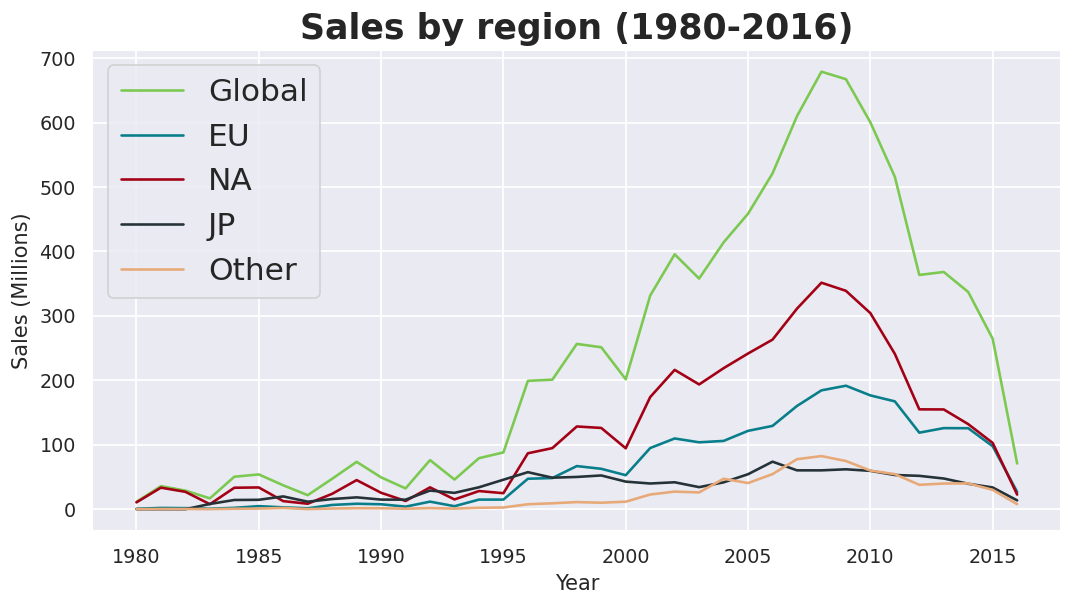

In [8]:
sales_na = vgsales[['Year','NA_Sales']].groupby("Year").sum()
sales_jp = vgsales[['Year','JP_Sales']].groupby("Year").sum()
sales_eu = vgsales[['Year','EU_Sales']].groupby("Year").sum()
sales_global = vgsales[['Year','Global_Sales']].groupby("Year").sum()
sales_others = vgsales[['Year','Other_Sales']].groupby("Year").sum()
years = sales_global.index
regions = ['Global','EU','NA','JP','Other']
c1,c2,c3,c4,c5 = '#7BC950','#087E8B','#A30015','#253237','#E7A977'

ax = sns.lineplot(x=years, y=sales_global.Global_Sales, color=c1)
ax = sns.lineplot(x=years, y=sales_eu.EU_Sales, color=c2)
ax = sns.lineplot(x=years, y=sales_na.NA_Sales, color=c3)
ax = sns.lineplot(x=years, y=sales_jp.JP_Sales, color=c4)
ax = sns.lineplot(x=years, y=sales_others.Other_Sales, color=c5)
ax.set_ylabel(ylabel='Sales (Millions)')
ax.set_title('Sales by region (1980-2016)', fontsize=20,fontweight='bold')
ax.legend(handles=ax.lines[::], labels=regions, fontsize=18)
plt.show();

This is definitely an unexpected result, I wonder if something happen between 2005-2010 that drop the trend so much, the financial crisis maybe? Or some other reasons that sees the decline of the video game industry? Let's see if we can figure out something later, but I'm sure it's a more complex problem that involves many more external factors like the economic wellbeing and other industries.

For now let me create a heatmap to see if there are any interesting correlation between the sales of different region.

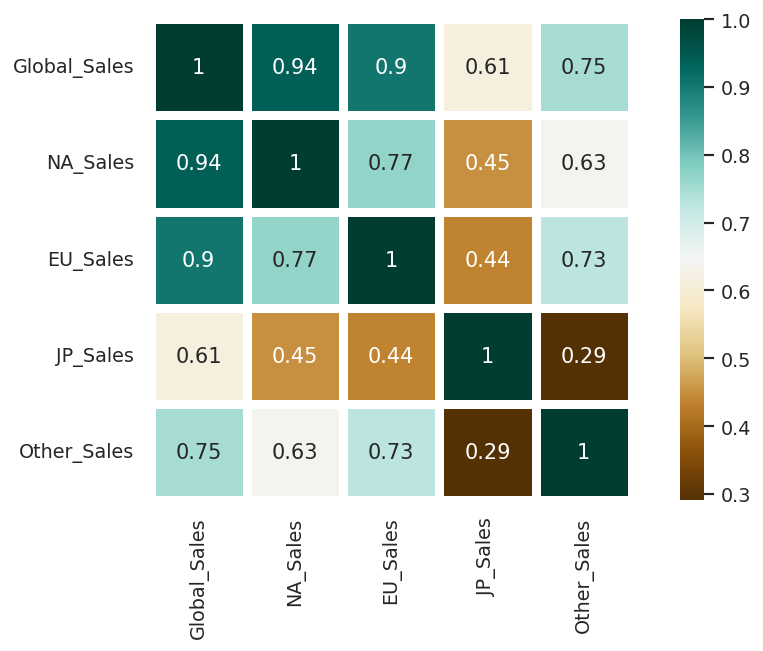

In [9]:
sns.heatmap(vgsales[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].corr(), annot=True, cmap="BrBG", square=True, linewidths=5)
sns.set(rc={"figure.dpi":60})

Different regions generally show a positive correlation against each other, which is understandable. But Japan is slightly different from other regions and have generally have a lower correlation against different region, we should definitely keep an eye on the performance of Japan in later sections.

# Most popular publisher with their games across regions

Speaking of sales, I wonder what's some of the most sold games in different regions.

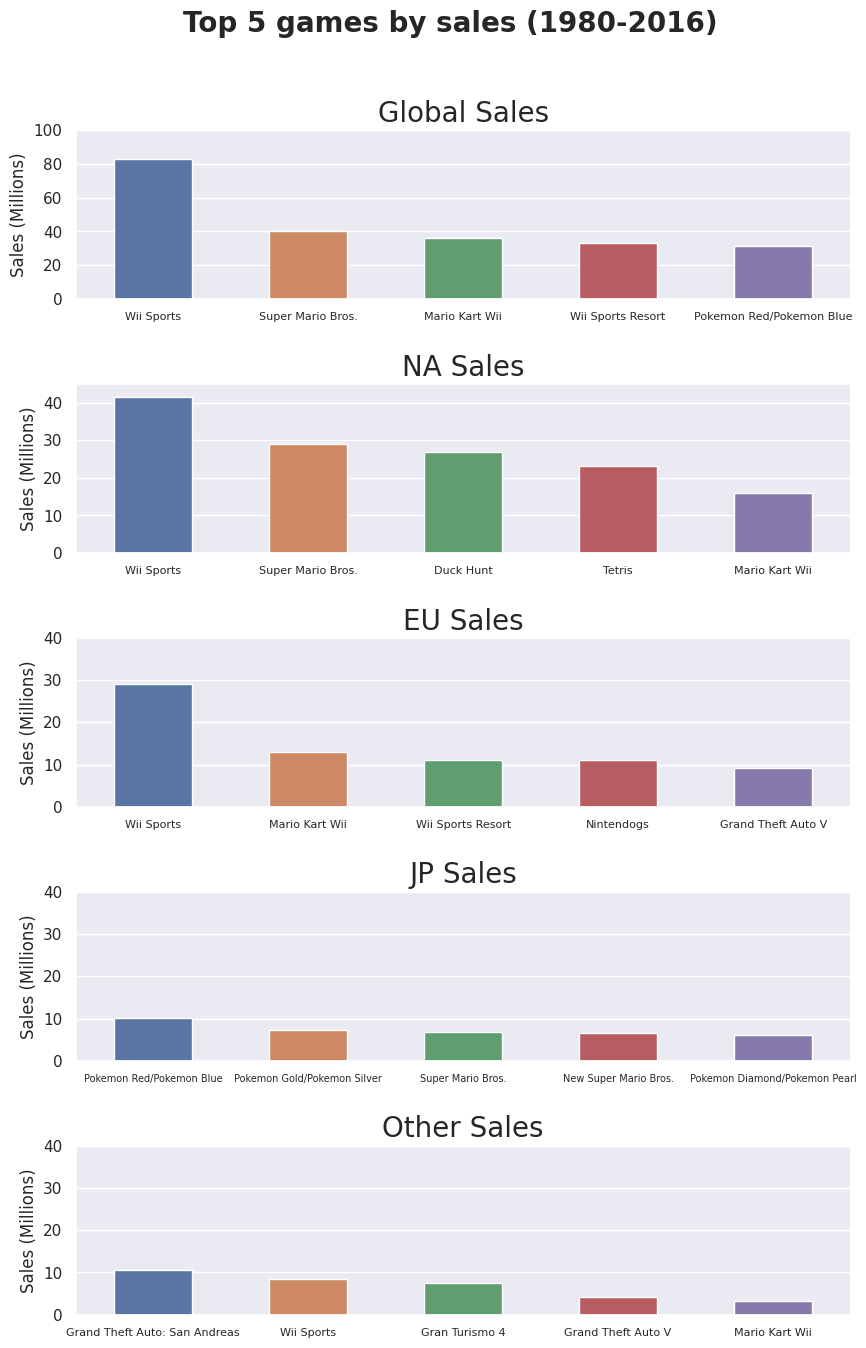

In [10]:
#DataFrames
ggame_sales = vgsales[['Name','Global_Sales']].nlargest(5,'Global_Sales')
nagame_sales = vgsales[['Name','NA_Sales']].nlargest(5,'NA_Sales')
jpgame_sales = vgsales[['Name','JP_Sales']].nlargest(5,'JP_Sales')
eugame_sales = vgsales[['Name','EU_Sales']].nlargest(5,'EU_Sales')
ogame_sales = vgsales[['Name','Other_Sales']].nlargest(5,'Other_Sales')
# colors =  {'Wii Sports':'#01befe', 
#         'Mario Kart Wii':"#ffdd00", 
#         'Wii Sports Resort':"#ff7d00", 
#         'Super Mario Bros.':"#ff006d", 
#         'Pokemon Red/Pokemon Blue':"#adff02", 
#         'Pokemon Gold/Pokemon Silver':'#8f00ff',
#         'New Super Mario Bros.':'#4900ff',
#         'Pokemon Diamond/Pokemon Pearl':'#F26419',
#         'Duck Hunt':'#157F1F',
#         'Tetris':'#FFC0BE',
#         'Nintendogs':'#ff00ff',
#         'Grand Theft Auto V':'#00ffff',
#         'Grand Theft Auto: San Andreas':'#00ff15',
#         'Gran Turismo 4':'#f00c18',}
#Fig config 
fig = plt.figure(figsize=(10,15), dpi=100)
fig.tight_layout(pad=5)
plt.subplots_adjust(top=0.90,hspace=0.5)
plt.suptitle('Top 5 games by sales (1980-2016)', size=20,fontweight = 'bold')


#add subplots
ax1 = fig.add_subplot(511)
ax1 = sns.barplot(data=ggame_sales,x='Name',y='Global_Sales',width = 0.5)
ax1.set_title('Global Sales', size=20)
ax1.set_xlabel('')
ax1.axes.get_xaxis()
ax1.set_xticklabels(labels = ggame_sales.Name, size=8)
ax1.set_ylabel(ylabel='Sales (Millions)')
ax1.set_ylim(top=100)


ax2 = fig.add_subplot(512)
ax2 = sns.barplot(data=nagame_sales,x='Name',y='NA_Sales',width = 0.5)
ax2.set_xlabel('')
ax2.set_xticklabels(labels = nagame_sales.Name, size=8)
ax2.set_title('NA Sales', size=20)
ax2.set_ylabel(ylabel='Sales (Millions)')
ax2.set_ylim(top=45)


ax3 = fig.add_subplot(513)
ax3 = sns.barplot(data=eugame_sales,x='Name',y='EU_Sales',width = 0.5)
ax3.set_xlabel('')
ax3.set_xticklabels(labels = eugame_sales.Name, size=8)
ax3.set_title('EU Sales', size=20)
ax3.set_ylabel(ylabel='Sales (Millions)')
ax3.set_ylim(top=40)


ax4 = fig.add_subplot(514)
ax4 = sns.barplot(data=jpgame_sales,x='Name',y='JP_Sales',width = 0.5)
ax4.set_xlabel('')
ax4.set_xticklabels(labels = jpgame_sales.Name, size=7)
ax4.set_title('JP Sales', size=20)
ax4.set_ylabel(ylabel='Sales (Millions)')
ax4.set_ylim(top=40)


ax5 = fig.add_subplot(515)
ax5 = sns.barplot(data=ogame_sales,x='Name',y='Other_Sales',width = 0.5)
ax5.set_xlabel('')
ax5.set_xticklabels(labels = ogame_sales.Name, size=8)
ax5.set_title('Other Sales', size=20)
ax5.set_ylabel(ylabel='Sales (Millions)')
ax5.set_ylim(top=40)



plt.show()

Some big names we are seeing here, 

* **Wii sports** with their dominance around the globe with the highest sales in america, europe and second most sales in 'other'. 
* Several big series such as **Mario**, **Pokemon** and **Grand Theft Auto**, with the Pokemon taking up 4 out of the top 5 most sold games in Japan.

If I remember correctly, a lot of these games like Wii Sports and the Mario series are products from Nintendo, I wonder if they take up the most sales in the global market between 1980-2016.

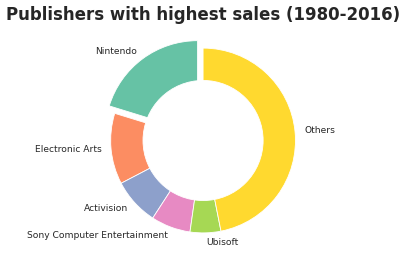

In [11]:
region = 'Global_Sales'
top5 = vgsales[['Publisher',region]]
others = (top5.groupby('Publisher').sum().sort_values(by=region, ascending=False)[5:].Global_Sales.sum())
top5 = top5.groupby('Publisher').sum().sort_values(by=region, ascending=False)[:5]
top5.loc['Others'] = others
top5_arr = np.reshape(top5.values,-1)
top1_share = f'{round(top5_arr[0] / top5_arr.sum() * 100,1)}%'

plt.pie(
    top5_arr,
    labels = top5.index,
    shadow = False,     
    startangle = 90,
    colors=sns.color_palette('Set2'),
    explode = [0.1,0,0,0,0,0],
    )

hole = plt.Circle((0, 0), 0.65, facecolor='white')

plt.gcf().gca().add_artist(hole)

plt.title('Publishers with highest sales (1980-2016)',fontdict={'size':20},fontweight = 'bold')
plt.show()

Yup, Nintendo is the publisher with the highest global sales from 1980-2016, following by Electronic Arts, Activision, Sony Computer Entertainment and Ubisoft. Let's see if we can check out what's their biggest hits.

In [12]:
nintendo_top5 = vgsales[vgsales['Publisher']=='Nintendo'].sort_values(by='Global_Sales',ascending=False).iloc[:5,:]
nintendo_top5 = nintendo_top5[['Name','Platform','Year','Genre','Global_Sales']]
nintendo_top5 = nintendo_top5.set_index('Name')
nintendo_top5.style.set_caption("Nintendo")

,Platform,Year,Genre,Global_Sales
Name,,,,
Wii Sports,Wii,2006,Sports,82.740000
Super Mario Bros.,NES,1985,Platform,40.240000
Mario Kart Wii,Wii,2008,Racing,35.820000
Wii Sports Resort,Wii,2009,Sports,33.000000
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,31.370000


In [13]:
EA_top5 = vgsales[vgsales['Publisher']=='Electronic Arts'].sort_values(by='Global_Sales',ascending=False).iloc[:5,:]
EA_top5 = EA_top5[['Name','Platform','Year','Genre','Global_Sales']]
EA_top5 = EA_top5.set_index('Name')
EA_top5.style.set_caption("Electronic Arts")

,Platform,Year,Genre,Global_Sales
Name,,,,
FIFA 16,PS4,2015,Sports,8.490000
FIFA Soccer 13,PS3,2012,Action,8.240000
The Sims 3,PC,2009,Simulation,8.110000
Star Wars Battlefront (2015),PS4,2015,Shooter,7.670000
Battlefield 3,X360,2011,Shooter,7.340000


In [14]:
Act_top5 = vgsales[vgsales['Publisher']=='Activision'].sort_values(by='Global_Sales',ascending=False).iloc[:5,:]
Act_top5 = Act_top5[['Name','Platform','Year','Genre','Global_Sales']]
Act_top5 = Act_top5.set_index('Name')
Act_top5.style.set_caption("Activision")

,Platform,Year,Genre,Global_Sales
Name,,,,
Call of Duty: Modern Warfare 3,X360,2011,Shooter,14.760000
Call of Duty: Black Ops,X360,2010,Shooter,14.640000
Call of Duty: Black Ops 3,PS4,2015,Shooter,14.240000
Call of Duty: Black Ops II,PS3,2012,Shooter,14.030000
Call of Duty: Black Ops II,X360,2012,Shooter,13.730000


In [15]:
Sony_top5 = vgsales[vgsales['Publisher']=='Sony Computer Entertainment'].sort_values(by='Global_Sales',ascending=False).iloc[:5,:]
Sony_top5 = Sony_top5[['Name','Platform','Year','Genre','Global_Sales']]
Sony_top5 = Sony_top5.set_index('Name')
Sony_top5.style.set_caption("Sony Computer Entertainment")

,Platform,Year,Genre,Global_Sales
Name,,,,
Gran Turismo 3: A-Spec,PS2,2001,Racing,14.980000
Gran Turismo 4,PS2,2004,Racing,11.660000
Gran Turismo,PS,1997,Racing,10.950000
Gran Turismo 5,PS3,2010,Racing,10.770000
Final Fantasy VII,PS,1997,Role-Playing,9.720000


In [16]:
ubi_top5 = vgsales[vgsales['Publisher']=='Ubisoft'].sort_values(by='Global_Sales',ascending=False).iloc[:5,:]
ubi_top5 = ubi_top5[['Name','Platform','Year','Genre','Global_Sales']]
ubi_top5 = ubi_top5.set_index('Name')
ubi_top5.style.set_caption("Ubisoft")

,Platform,Year,Genre,Global_Sales
Name,,,,
Just Dance 3,Wii,2011,Misc,10.260000
Just Dance 2,Wii,2010,Misc,9.520000
Just Dance,Wii,2009,Misc,7.270000
Just Dance 4,Wii,2012,Misc,6.910000
Assassin's Creed III,PS3,2012,Action,6.500000


We definitely gain a deeper insight to the publishers and the industry. Some popular series that aren't top 5 sales among regions alone but have multiple big hits like

* **FIFA (Electronic Arts)**
* **Call of Duty (Activision)**
* **Gran Turismo (Sony Computer Entertainment)**
* **Just Dance (Ubisoft)**

to name a few.

We also see some shift in influence over the market, for exmaple, Nintendo and Sony Computer Entertainment seems to be more popular before the 2010s, while Electronic Arts, Activision and Ubisoft seems to rise after the 2010s, just based on the above shortened data.

Also, it seems like the raw data aren't that accurate, for example, FIFA 16 is labelled as 'Sport' while FIFA Soccer 13 is labelled as 'Action', but in reality they are the same series of games which should both be under the 'Sports' genre. This definitely will have some impact to our later analysis.

Speaking of which, notice that different publishers seems to be specialized in certain genre, like racing for Sony Computer Entertainment and shooter for Activision. Let's see if this hypothesis is correct.

# Trend of Genres

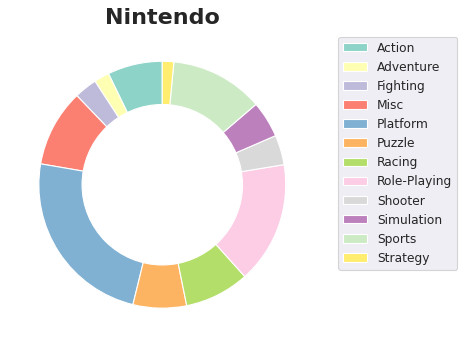

In [17]:
publisher='Nintendo'
g_share = vgsales[vgsales['Publisher']==publisher][['Genre','Global_Sales']].groupby('Genre').sum()

plt.figure(figsize=(6,6), dpi=80)
plt.pie(
    g_share.Global_Sales,
    shadow = False,     
    startangle = 90,
    colors=sns.color_palette('Set3'),
    )

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.legend(labels=g_share.index,bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

plt.title('Nintendo',fontdict={'size':20},fontweight = 'bold')
plt.show()

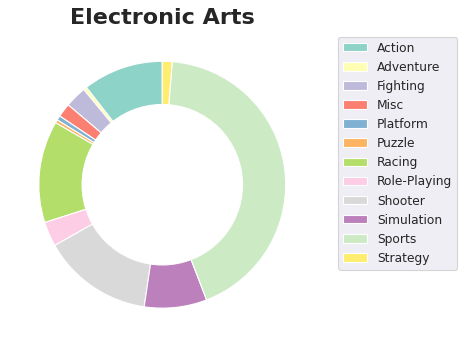

In [18]:
publisher='Electronic Arts'
g_share = vgsales[vgsales['Publisher']==publisher][['Genre','Global_Sales']].groupby('Genre').sum()

plt.figure(figsize=(6,6), dpi=80)
plt.pie(
    g_share.Global_Sales,
    shadow = False,     
    startangle = 90,
    colors=sns.color_palette('Set3'),
    )

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.legend(labels=g_share.index,bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

plt.title('Electronic Arts',fontdict={'size':20},fontweight = 'bold')
plt.show()

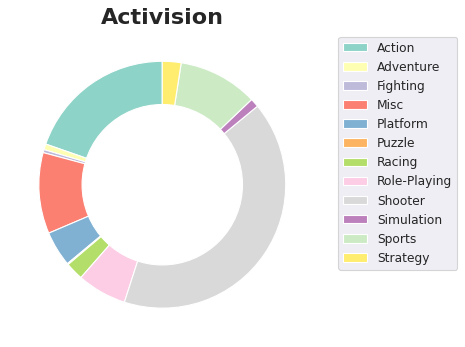

In [19]:
publisher='Activision'
g_share = vgsales[vgsales['Publisher']==publisher][['Genre','Global_Sales']].groupby('Genre').sum()

plt.figure(figsize=(6,6), dpi=80)
plt.pie(
    g_share.Global_Sales,
    shadow = False,     
    startangle = 90,
    colors=sns.color_palette('Set3'),
    )

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.legend(labels=g_share.index,bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

plt.title('Activision',fontdict={'size':20},fontweight = 'bold')
plt.show()

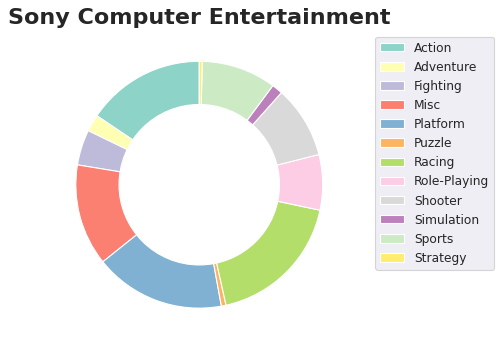

In [20]:
publisher='Sony Computer Entertainment'
g_share = vgsales[vgsales['Publisher']==publisher][['Genre','Global_Sales']].groupby('Genre').sum()

plt.figure(figsize=(6,6), dpi=80)
plt.pie(
    g_share.Global_Sales,
    shadow = False,     
    startangle = 90,
    colors=sns.color_palette('Set3'),
    )

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.legend(labels=g_share.index,bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

plt.title('Sony Computer Entertainment',fontdict={'size':20},fontweight = 'bold')
plt.show()

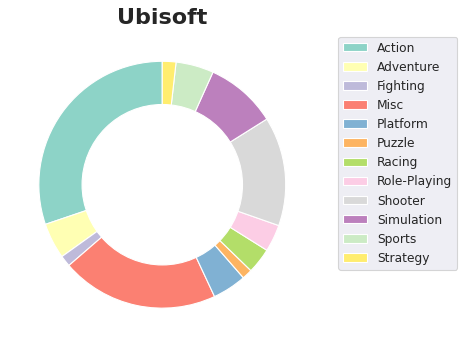

In [21]:
publisher='Ubisoft'
g_share = vgsales[vgsales['Publisher']==publisher][['Genre','Global_Sales']].groupby('Genre').sum()

plt.figure(figsize=(6,6), dpi=80)
plt.pie(
    g_share.Global_Sales,
    shadow = False,     
    startangle = 90,
    colors=sns.color_palette('Set3'),
    )

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.legend(labels=g_share.index,bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

plt.title('Ubisoft',fontdict={'size':20},fontweight = 'bold')
plt.show()

In general, we do observe specialization of publishers in one to two particular genre.

* Nintendo: **Platform, Role-Playing**
* Electronic Arts: **Sports**
* Activision: **Shooter, Action**
* Ubisoft: **Action, Misc**

while Sony Computer Entertainment seems to be more diversed between platform, racing, action, misc, sports, shooter and role-playing. Now let's see what's some of the most popular genres in general.

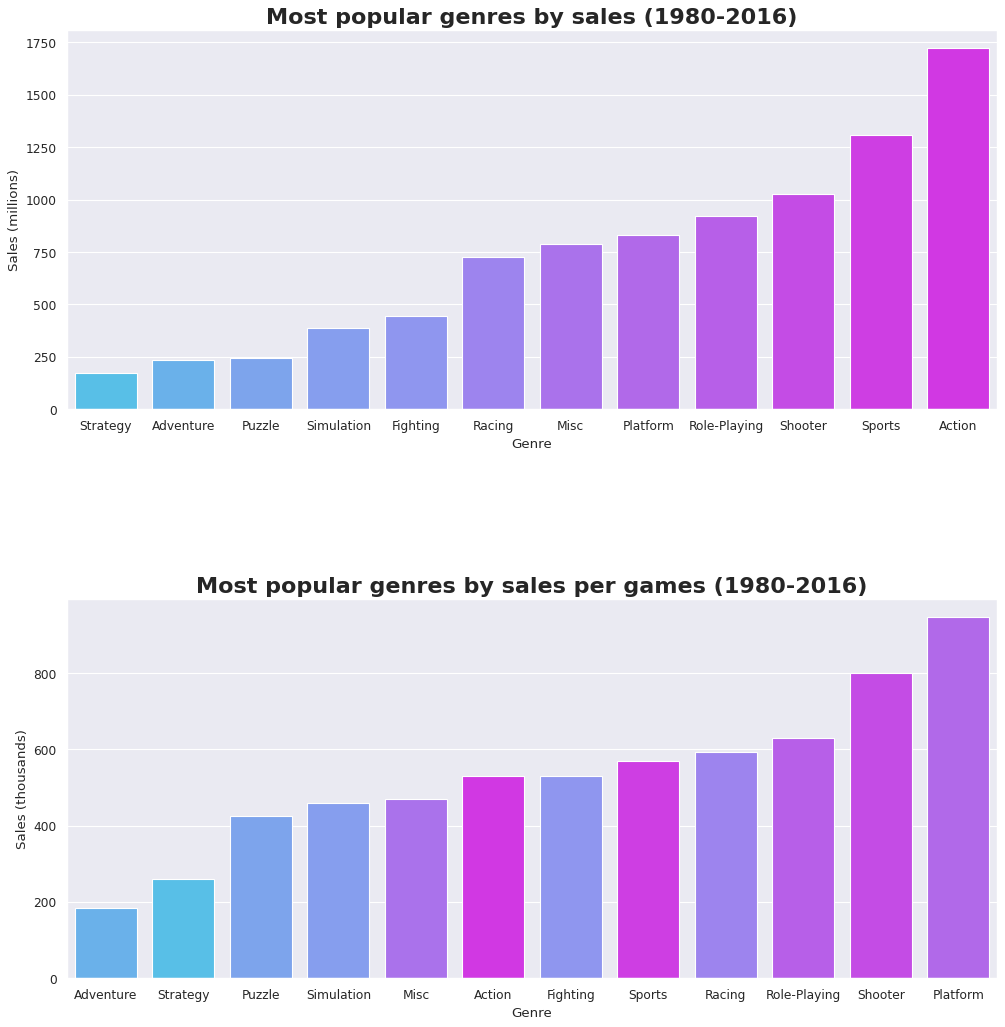

In [22]:
genre_gsales_r = vgsales[['Genre','Global_Sales']]
genre_gsales = genre_gsales_r.groupby('Genre').sum().sort_values(by='Global_Sales')
clrs = {"Strategy": '#40C9FF',
       "Adventure": '#55B4FF',
       "Puzzle":'#6A9EFF',
       "Simulation":'#7594FF',
       "Fighting":'#7F89FF',
       "Racing":'#9473FF',
       "Misc": '#A95EFF',
       "Platform": '#B453FF',
       "Role-Playing":'#BE48FF',
       "Shooter":'#D332FF',
       "Sports":'#E322FF',
       "Action":'#E81CFF'}

fig = plt.figure(figsize=(15,15), dpi=80)
fig.tight_layout(pad=5)
plt.subplots_adjust(top=0.90,hspace=0.5)

ax1 = fig.add_subplot(211)
ax1 = sns.barplot(data = genre_gsales, x = genre_gsales.index, y ='Global_Sales',palette=clrs)
ax1.set_title('Most popular genres by sales (1980-2016)',fontdict={'size':20},fontweight = 'bold')
ax1.set_ylabel('Sales (millions)')

genre_gsales = genre_gsales_r.groupby('Genre').agg({'Global_Sales': ['sum','count']})
genre_gsales['sales_per_game']=round((genre_gsales.Global_Sales.iloc[:,0]/genre_gsales.Global_Sales.iloc[:,1])*1000,1)
genre_gsales.sort_values(('Global_Sales','sum'))
genre_gsales = genre_gsales.sort_values('sales_per_game')

ax2 = fig.add_subplot(212)
ax2 = sns.barplot(data = genre_gsales, x = genre_gsales.index, y ='sales_per_game', palette=clrs)
ax2.set_title('Most popular genres by sales per games (1980-2016)',fontdict={'size':20},fontweight = 'bold')
ax2.set_ylabel('Sales (thousands)')

plt.show()

It seems that throughout 1980 to 2016, **Action** games are the most popular in terms of sales while **Platform** games are most profitable in terms of sales per games.

What about regional speaking, are there any particular genre that are gaining popularity by region throughout these years? Remember the heatmap we plotted just now? I would imagine that the data from Japan may differ from the global trend out of their different consumption pattern, let's see if we are correct.

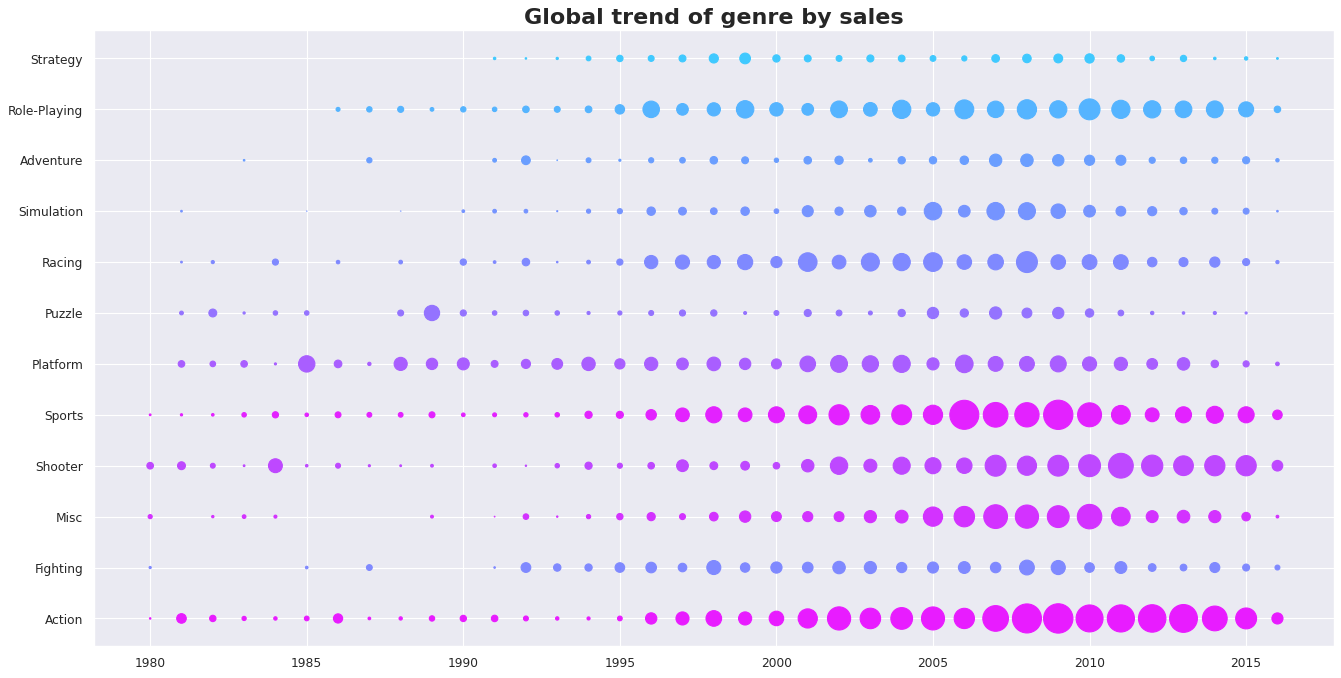

In [23]:
region = 'Global_Sales'
genre_trend = vgsales[['Year','Genre',region]].groupby(['Year','Genre']).sum()
genre_trend.unstack()
genre_trend = genre_trend.reset_index() 

#coloring
clrs = {"Strategy": '#40C9FF',
       "Adventure": '#6A9EFF',
       "Puzzle":'#9473FF',
       "Simulation":'#7594FF',
       "Fighting":'#7F89FF',
       "Racing":'#7F89FF',
       "Misc": '#D332FF',
       "Platform": '#A95EFF',
       "Role-Playing":'#55B4FF',
       "Shooter":'#BE48FF',
       "Sports":'#E322FF',
       "Action":'#E81CFF'}
def coloring(x):
    return clrs[x]
genre_trend['clrs'] = genre_trend['Genre'].apply(coloring)

plt.figure(figsize=(20,10), dpi=80)
plt.scatter(data=genre_trend,x='Year',y='Genre',s=genre_trend[region]*5,c=genre_trend['clrs'])
plt.title('Global trend of genre by sales',fontsize=20,fontweight='bold')
plt.show()

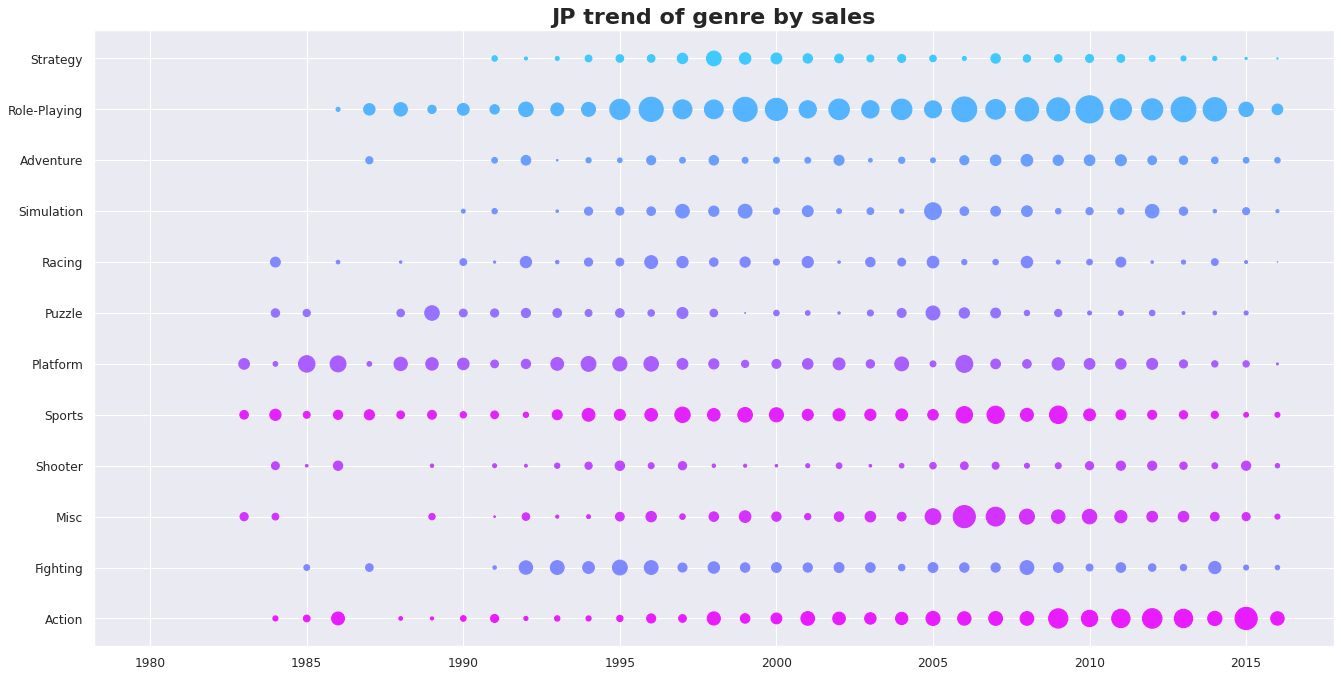

In [24]:
region = 'JP_Sales'
genre_trend = vgsales[['Year','Genre',region]].groupby(['Year','Genre']).sum()
genre_trend.unstack()
genre_trend = genre_trend.reset_index() 

#coloring
clrs = {"Strategy": '#40C9FF',
       "Adventure": '#6A9EFF',
       "Puzzle":'#9473FF',
       "Simulation":'#7594FF',
       "Fighting":'#7F89FF',
       "Racing":'#7F89FF',
       "Misc": '#D332FF',
       "Platform": '#A95EFF',
       "Role-Playing":'#55B4FF',
       "Shooter":'#BE48FF',
       "Sports":'#E322FF',
       "Action":'#E81CFF'}
def coloring(x):
    return clrs[x]
genre_trend['clrs'] = genre_trend['Genre'].apply(coloring)

plt.figure(figsize=(20,10), dpi=80)
plt.scatter(data=genre_trend,x='Year',y='Genre',s=genre_trend[region]*25,c=genre_trend['clrs'])
plt.title('JP trend of genre by sales',fontsize=20,fontweight='bold')
plt.show()

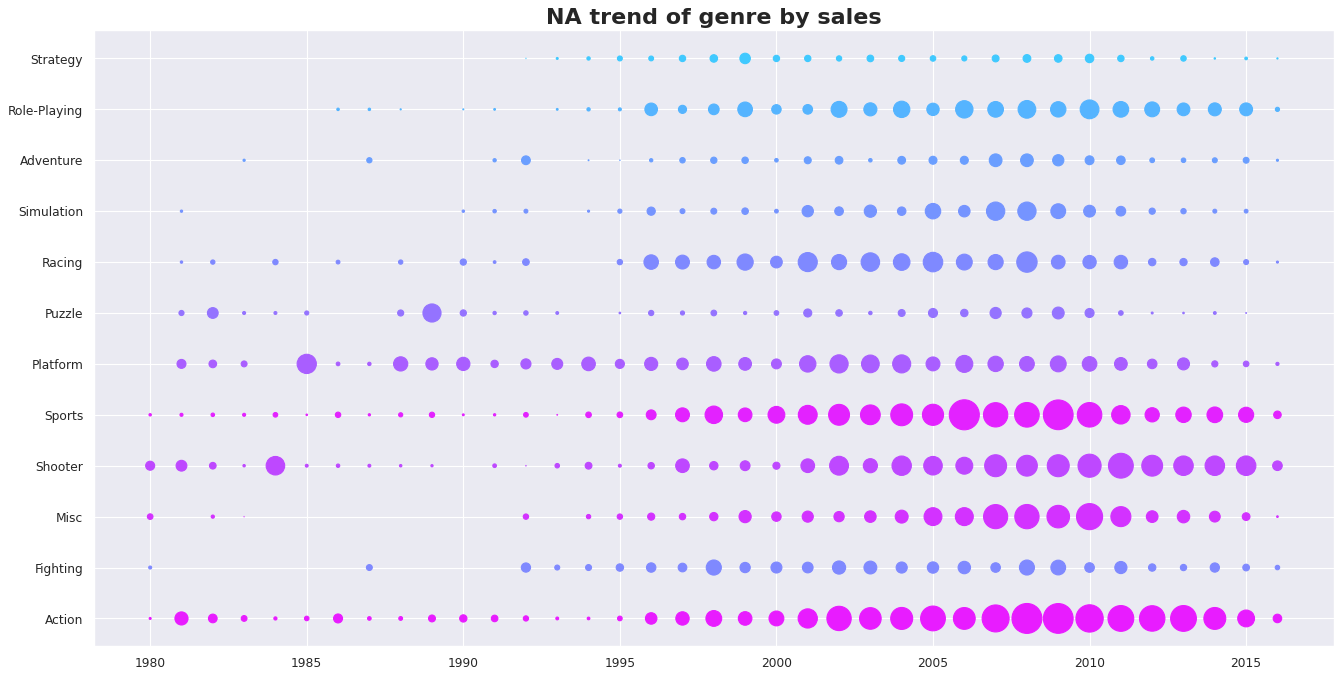

In [25]:
region = 'NA_Sales'
genre_trend = vgsales[['Year','Genre',region]].groupby(['Year','Genre']).sum()
genre_trend.unstack()
genre_trend = genre_trend.reset_index() 

#coloring
clrs = {"Strategy": '#40C9FF',
       "Adventure": '#6A9EFF',
       "Puzzle":'#9473FF',
       "Simulation":'#7594FF',
       "Fighting":'#7F89FF',
       "Racing":'#7F89FF',
       "Misc": '#D332FF',
       "Platform": '#A95EFF',
       "Role-Playing":'#55B4FF',
       "Shooter":'#BE48FF',
       "Sports":'#E322FF',
       "Action":'#E81CFF'}
def coloring(x):
    return clrs[x]
genre_trend['clrs'] = genre_trend['Genre'].apply(coloring)

plt.figure(figsize=(20,10), dpi=80)
plt.scatter(data=genre_trend,x='Year',y='Genre',s=genre_trend[region]*10,c=genre_trend['clrs'])
plt.title('NA trend of genre by sales',fontsize=20,fontweight='bold')
plt.show()

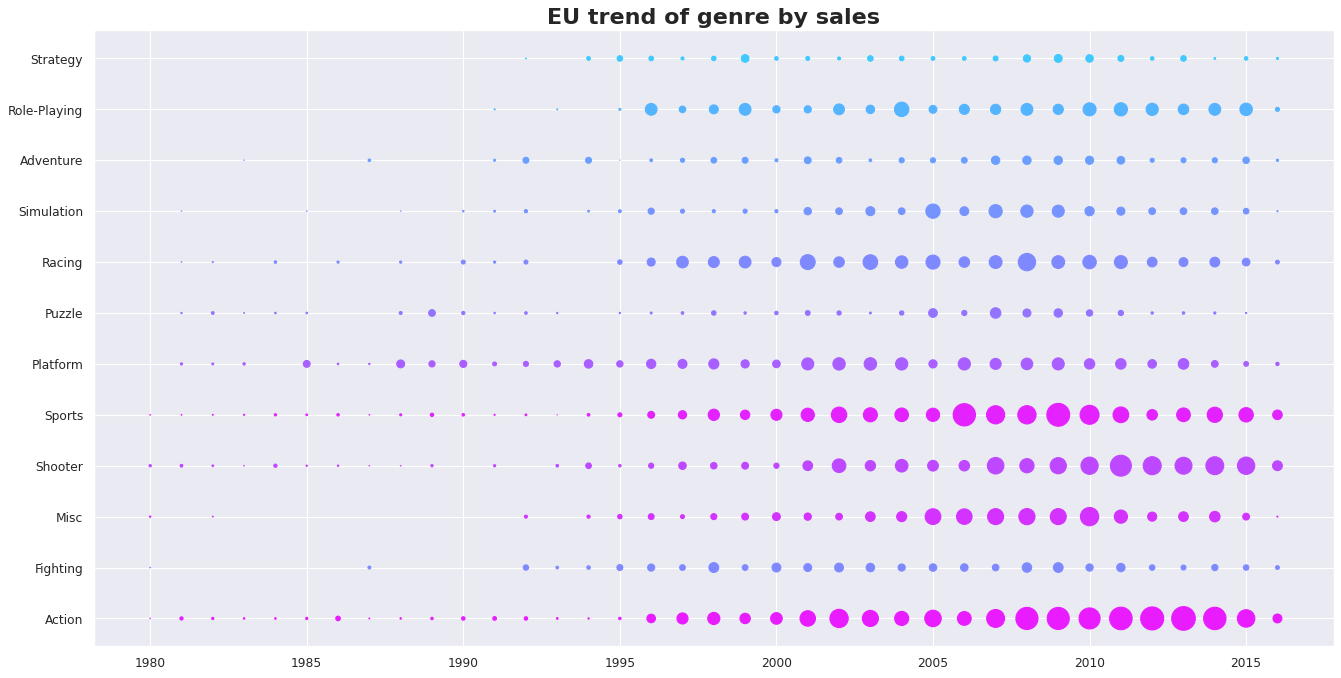

In [26]:
region = 'EU_Sales'
genre_trend = vgsales[['Year','Genre',region]].groupby(['Year','Genre']).sum()
genre_trend.unstack()
genre_trend = genre_trend.reset_index() 

#coloring
clrs = {"Strategy": '#40C9FF',
       "Adventure": '#6A9EFF',
       "Puzzle":'#9473FF',
       "Simulation":'#7594FF',
       "Fighting":'#7F89FF',
       "Racing":'#7F89FF',
       "Misc": '#D332FF',
       "Platform": '#A95EFF',
       "Role-Playing":'#55B4FF',
       "Shooter":'#BE48FF',
       "Sports":'#E322FF',
       "Action":'#E81CFF'}
def coloring(x):
    return clrs[x]
genre_trend['clrs'] = genre_trend['Genre'].apply(coloring)

plt.figure(figsize=(20,10), dpi=80)
plt.scatter(data=genre_trend,x='Year',y='Genre',s=genre_trend[region]*10,c=genre_trend['clrs'])
plt.title('EU trend of genre by sales',fontsize=20,fontweight='bold')
plt.show()

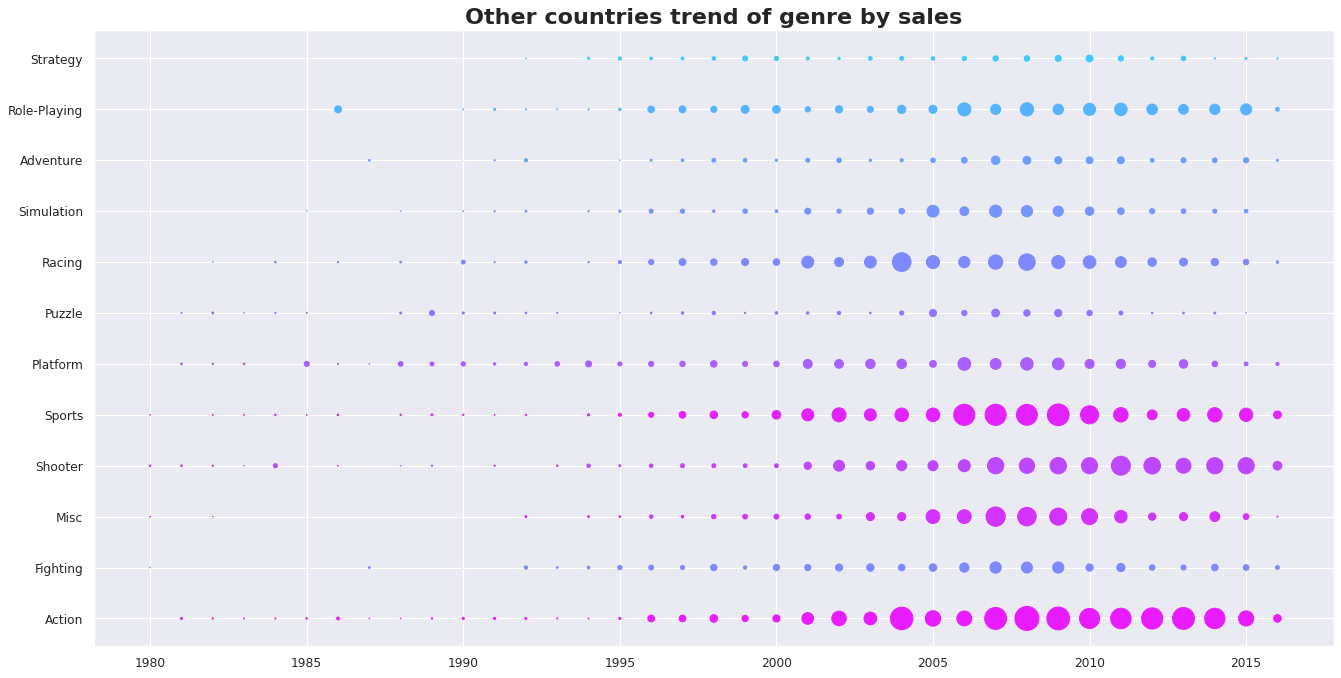

In [27]:
region = 'Other_Sales'
genre_trend = vgsales[['Year','Genre',region]].groupby(['Year','Genre']).sum()
genre_trend.unstack()
genre_trend = genre_trend.reset_index() 

#coloring
clrs = {"Strategy": '#40C9FF',
       "Adventure": '#6A9EFF',
       "Puzzle":'#9473FF',
       "Simulation":'#7594FF',
       "Fighting":'#7F89FF',
       "Racing":'#7F89FF',
       "Misc": '#D332FF',
       "Platform": '#A95EFF',
       "Role-Playing":'#55B4FF',
       "Shooter":'#BE48FF',
       "Sports":'#E322FF',
       "Action":'#E81CFF'}
def coloring(x):
    return clrs[x]
genre_trend['clrs'] = genre_trend['Genre'].apply(coloring)

plt.figure(figsize=(20,10), dpi=80)
plt.scatter(data=genre_trend,x='Year',y='Genre',s=genre_trend[region]*25,c=genre_trend['clrs'])
plt.title('Other countries trend of genre by sales',fontsize=20,fontweight='bold')
plt.show()

Noted that the size of each dots depends on their respective sales of that genre in that particular year, the higher the sales, the larger the size of the dots.

As we suspected, most genres shown an increase in dot size up till 2008-2009 period and shrinken their size afterwards. One interesting observation though is that  **Role-playing** games in **Japan** are definitely more popular relatively comparing to other countries and that genre have been showing consistent sales since 1995 as their size of dots are relatively consistent compare to other genres. 

There are definitely a lot more observations we can tell based on these plots, by I'm going to leave it here for you guys to intepretate. At the mean time, let's move on to the next section - platform.

# How different platforms performed

Platform is definitely a very important factor that will impact sales of video games by a large extend. For example, as a PC gamer myself that doesn't have a Xbox or PlayStation at home, I would probably not consider buying Xbox games that much considering the extra cost to buy the console, while on the other hand, a person owning a Xbox may be more tempted to buy new games on the platform since 'it would be a waste if I only play one game on Xbox'. 

I believe that it is very important to understand the trend of platforms over the years to understand ownership and trend of the market, so as to make better decisions for future video game sales. Same as the previous section, I will be using a scaled dotted plot to understand the trend of platform uses over the past decades. 

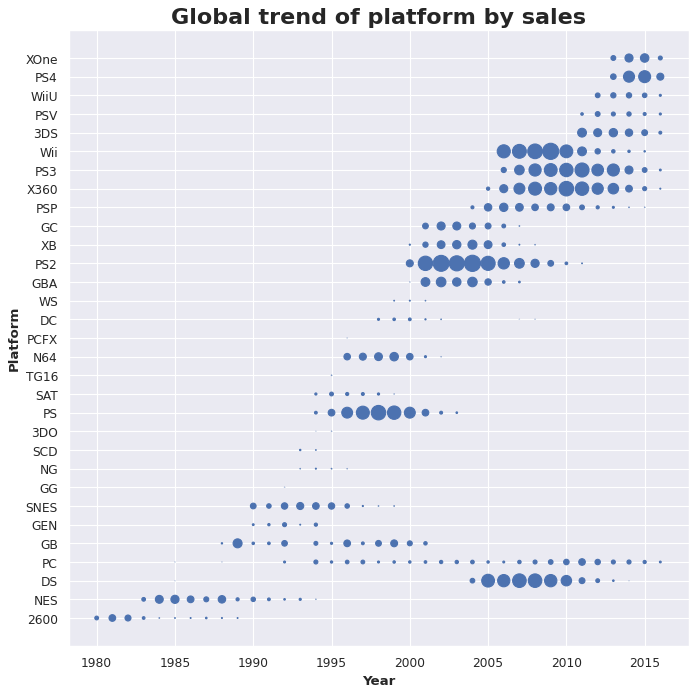

In [28]:
region = 'Global_Sales'
platform_trend = vgsales[['Year','Platform',region]].groupby(['Year','Platform']).sum()
platform_trend.unstack()
platform_trend = platform_trend.reset_index() 

fig = plt.figure(figsize=(10,10), dpi=80)
plt.scatter(data = platform_trend,x='Year',y='Platform',s=platform_trend[region])
plt.title('Global trend of platform by sales',fontsize=20,fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Platform', fontweight='bold')
plt.show()

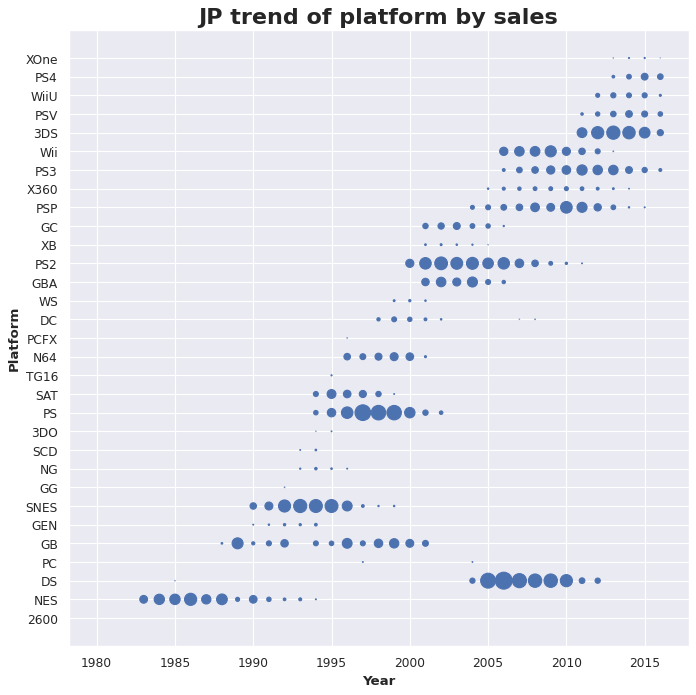

In [29]:
region = 'JP_Sales'
platform_trend = vgsales[['Year','Platform',region]].groupby(['Year','Platform']).sum()
platform_trend.unstack()
platform_trend = platform_trend.reset_index() 

fig = plt.figure(figsize=(10,10), dpi=80)
plt.scatter(data = platform_trend,x='Year',y='Platform',s=platform_trend[region]*6)
plt.title('JP trend of platform by sales',fontsize=20,fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Platform', fontweight='bold')
plt.show()

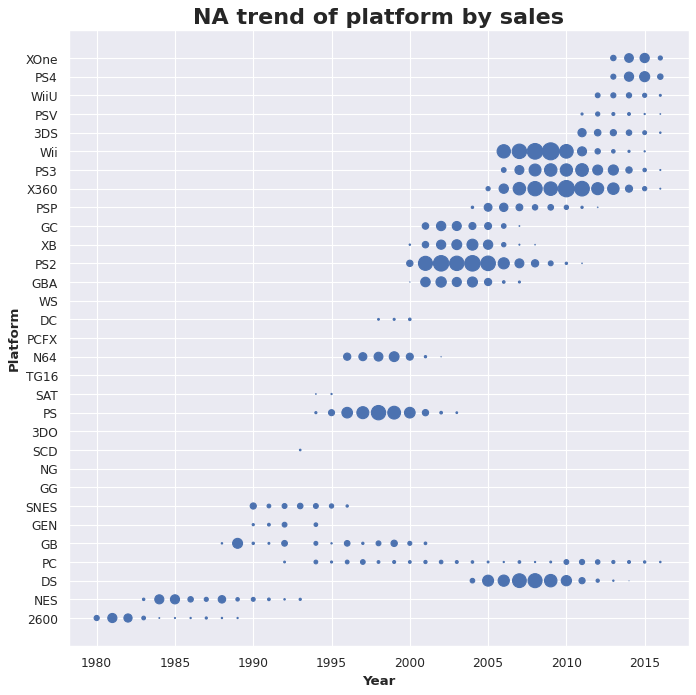

In [30]:
region = 'NA_Sales'
platform_trend = vgsales[['Year','Platform',region]].groupby(['Year','Platform']).sum()
platform_trend.unstack()
platform_trend = platform_trend.reset_index() 

fig = plt.figure(figsize=(10,10), dpi=80)
plt.scatter(data = platform_trend,x='Year',y='Platform',s=platform_trend[region]*2)
plt.title('NA trend of platform by sales',fontsize=20,fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Platform', fontweight='bold')
plt.show()

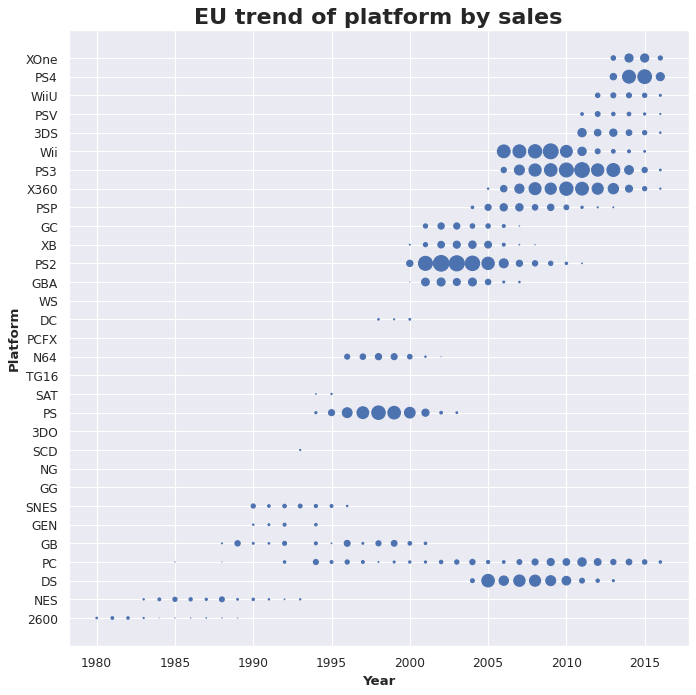

In [31]:
region = 'EU_Sales'
platform_trend = vgsales[['Year','Platform',region]].groupby(['Year','Platform']).sum()
platform_trend.unstack()
platform_trend = platform_trend.reset_index() 

fig = plt.figure(figsize=(10,10), dpi=80)
plt.scatter(data = platform_trend,x='Year',y='Platform',s=platform_trend[region]*3)
plt.title('EU trend of platform by sales',fontsize=20,fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Platform', fontweight='bold')
plt.show()

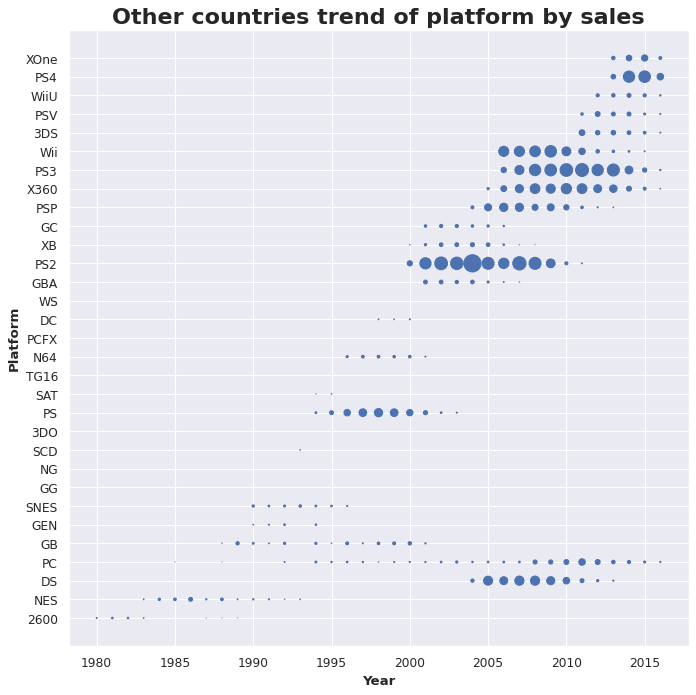

In [32]:
region = 'Other_Sales'
platform_trend = vgsales[['Year','Platform',region]].groupby(['Year','Platform']).sum()
platform_trend.unstack()
platform_trend = platform_trend.reset_index() 

fig = plt.figure(figsize=(10,10), dpi=80)
plt.scatter(data = platform_trend,x='Year',y='Platform',s=platform_trend[region]*6)
plt.title('Other countries trend of platform by sales',fontsize=20,fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Platform', fontweight='bold')
plt.show()

We definitely gain a lot of insights from these charts. But in general, we observe that
* **XOne and PS4** are relatively more popular **since 2014**
* **Wii, PS3, X360 and DS** are relatively more popular between **2005-2013**
* **PS2** is relatively more popular between **2000-2005**
* **PS** is relatively more popular between **1995-2000**
* Early consoles include **2600, NES, GB, GEN and SNES**
* Different regions generally show similar trends -- a more similar trend comparing to the trend of genres as a matter of fact

# Finally

Throughout these series of analysis, we may come up with several observations and predictions about future video games sales.
* Video game sales is expected to fall if the trend continues
* Video games are more popular in the United States and in Europe
* We expect games will more likely be playable on XOne and PS4 in the future
* and much more...

But interesting enough, as I am writing this right now in 2023, things are completely different from some of the trends that we observe from the dataset. The industry took a huge leap especially under the pandemic. We see more and more different variaties and big hits such as Fortnite and the crazy advancements of gaming quality such as the improvements in graphics throughout these few years, which is definitely something interesting to see and is something you could only see when working with these older datasets. 

Thank you very much for staying this far, I hope you guys enjoy this notebook or even learn something new from it. Again, please don't be hesitate to comment if you have anything you want to say and if you really like my work, don't be hesitate to put an upvote! Thanks!